### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [1]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-11-07 14:56:48--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>] 100.42K  --.-KB/s    in 0.01s   

2025-11-07 14:56:48 (6.92 MB/s) - ‘test.csv.1’ saved [102826/102826]



In [2]:
!pip install gensim
import gensim
from gensim import corpora
from gensim.models import TfidfModel
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [3]:
df = pd.read_csv('/content/test.csv')

3. Извлечь столбец с текстами (макс. балл == 1)

In [4]:
texts_df = df['text']

4. Построить Bag-of-Words (макс. балл == 3)

Matrix shape: (20, 20)
Самые частые слова:
user: 570
the: 387
to: 268
a: 227
of: 199
is: 186
for: 176
in: 165
and: 164
i: 135
on: 118
you: 92
this: 80
it: 79
that: 79
with: 71
are: 65
trump: 62
be: 60
not: 59


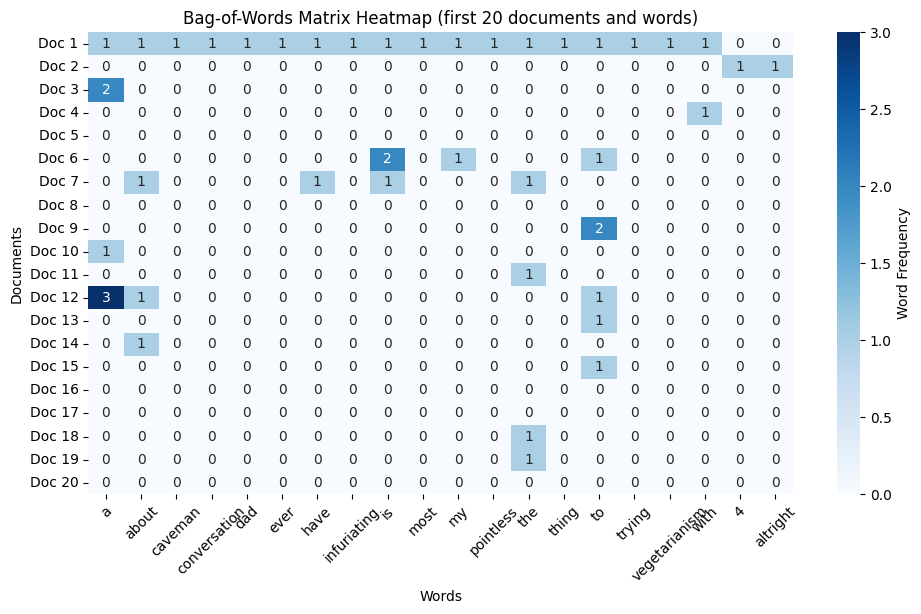

In [5]:
# - Приведите тексты к нижнему регистру
texts_lower = texts_df.str.lower()
# - Удалите знаки препинания
texts_cleaned = texts_lower.replace(r'[^\w\s]', '', regex=True)
# - Постройте словарь
tokenized_texts = [text.split() for text in texts_cleaned]
dictionary = corpora.Dictionary(tokenized_texts)
# - Преобразуйте документы в BoW векторы
bow_corpus = [dictionary.doc2bow(text) for text in tokenized_texts]


# - Создайте таблицу частот слов
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)

# - Постройте heatmap матрицы BoW
# Визуализация
matrix = np.array(dense_vectors)[:20, :20]
words = list(dictionary.token2id.keys())[:20]
doc_names = [f"Doc {i+1}" for i in range(len(tokenized_texts))][:20]

print(f"Matrix shape: {matrix.shape}")

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap (first 20 documents and words)')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')

# - Найдите самые частые слова в корпусе
print('Самые частые слова:')
for i in dictionary.most_common(20):
    print(f'{i[0]}: {i[1]}')

5. Построить TF-IDF (макс. балл == 5)

In [6]:
# - Используйте TfidfModel из gensim
tfidf_model = TfidfModel(bow_corpus)
# - Получите TF-IDF векторы для каждого документа
tfidf_corpus = tfidf_model[bow_corpus]

def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq

    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом

    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1

    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector

    return tf_matrix, df_vector, idf_vector, tfidf_manual

# - Для каждого слова вычислите:
#   * TF (term frequency) в каждом документе
#   * DF (document frequency) во всем корпусе
#   * IDF (inverse document frequency)
#   * значение TF-IDF
tfidf_analysis = analyze_tfidf_components(bow_corpus, dictionary)
tfidf = pd.DataFrame({'TF': tfidf_analysis[0][0],
                      'DF': tfidf_analysis[1],
                      'IDF': tfidf_analysis[2],
                      'TF-IDF': tfidf_analysis[3][0]})
# - Сохраните результат в *.сsv
tfidf.to_csv('tfidf.csv', sep=',', encoding='utf-8')
# - Прикрепите *.csv в ваш репозиторий